In [1]:
import cv2
import numpy as np
import os
import tensorflow as tf
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,dropout,fully_connected
from tflearn.layers.estimator import regression

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [22]:
Train_dir='f:/fistsh'
Test_dir=''
IMG_SIZE=50
LR=1e-3
MODEL_NAME="face-detector"
def CreateLabel(img_name):
    word_label=img_name.split('_')[-2]
    if word_label=="fist":
        return np.array([1,0,0])
    elif word_label=="palm":
        return np.array([0,1,0])
    elif word_label=="swing":
        return np.array([0,0,1])
    

In [23]:
def CreateTrainData():
    Trainig_data=[]
    for img in tqdm(os.listdir(Train_dir)):
        path=os.path.join(Train_dir,img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(IMG_SIZE,IMG_SIZE))
        Trainig_data.append([np.array(img_data),CreateLabel(img)])
    shuffle(Trainig_data)
    np.save('traindata.npy',Trainig_data)
    return Trainig_data

In [24]:
def CreateTestData():
    Testing_data=[]
    for img in tqdm(os.listdir(Test_dir)):
        path=os.path.join(Test_dir,img)
        img_num=img.split('.')[-1]
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img_data=cv2.resize(img_data,(IMG_SIZE,IMG_SIZE))
        Testing_data.append([np.array(img_data),img_num])
    shuffle(Testing_data)
    np.save('testdata.npy',Testing_data)
    return Testing_data

In [25]:
train_data=CreateTrainData()
#test_data=CreateTestData()


100%|██████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 2046.28it/s]


In [26]:
train=train_data[:-115]
test=train_data[-114:]

In [27]:
x_train=np.array([i[0] for i in train]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_train=[i[1] for i in train]
x_test=np.array([i[0] for i in test]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test=[i[1] for i in test]

In [28]:
tf.reset_default_graph()
convnet=input_data(shape=[None,IMG_SIZE,IMG_SIZE,1],name='input')
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,128,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)

convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)
convnet=fully_connected(convnet,3,activation='softmax')
convnet=regression(convnet,optimizer='adam',learning_rate=LR,loss='categorical_crossentropy',name='targets')
model=tflearn.DNN(convnet,tensorboard_dir='log',tensorboard_verbose=0)




In [29]:
model.fit({'input':x_train},{'targets':y_train},n_epoch=10,validation_set=({'input':x_test},{'targets':y_test}),
         snapshot_step=7,show_metric=True,run_id=MODEL_NAME)

Training Step: 19  | total loss: 1.20883 | time: 0.367s
| Adam | epoch: 010 | loss: 1.20883 - acc: 0.7468 -- iter: 064/115
Training Step: 20  | total loss: 0.87274 | time: 1.653s
| Adam | epoch: 010 | loss: 0.87274 - acc: 0.8282 | val_loss: 0.04431 - val_acc: 1.0000 -- iter: 115/115
--


In [ ]:
fig=plt.figure(figsize=(16,12))

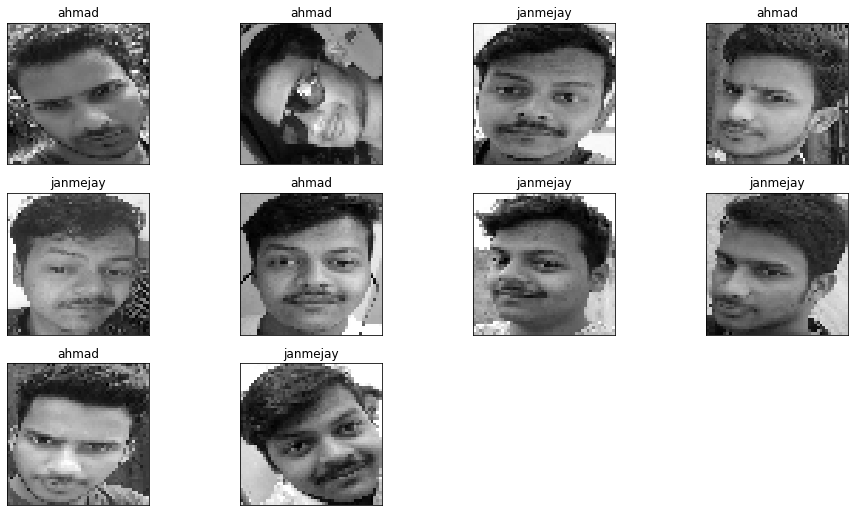

In [30]:
fig=plt.figure(figsize=(16,12))
for num,data in enumerate(test_data[:20]):
    img_num=data[1]
    img_data=data[0]
    y=fig.add_subplot(4,4,num+1)
    orig=img_data
    data=img_data.reshape(IMG_SIZE,IMG_SIZE,1)
    model_out=model.predict([data])[0]
    if np.argmax(model_out)==1:
        str_label='ahmad'
    else:
        str_label='janmejay'
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    
plt.show()

In [10]:
img_name='dog.211'

In [13]:
img_name.split('.')[-2]

'dog'

In [5]:
img='fist_5'

In [6]:
img.split('_')[-2]

'fist'

In [21]:
y_train.shape

AttributeError: 'list' object has no attribute 'shape'

In [45]:
img_data=cv2.imread('e:/X.png',0)
img_data=cv2.resize(img_data,(50,50))
cv2.imshow("img",img_data)
cv2.waitKey(2000)
cv2.destroyAllWindows()

In [46]:
data=img_data.reshape(50,50,1)
pred=model.predict([data])[0]

In [47]:
pred

array([0.34228578, 0.06205237, 0.5956618 ], dtype=float32)